#### Importing the usefull libraries and importing the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('CAR DETAILS.csv')
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


#### Getting information about the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


#### Handling Null and Duplicated data

In [5]:
df.isna().sum()     #no null values

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [6]:
df.duplicated().sum()


763

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(3577, 8)

#### Checking various columns

In [9]:
for i in df.columns:
    if i == 'selling_price' or i == 'km_driven':
        pass
    else:
        print(f"{i} \n {df[i].unique()}")
        print("-------------------------------------------------------------------------------------------------------")

name 
 ['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']
-------------------------------------------------------------------------------------------------------
year 
 [2007 2012 2017 2014 2016 2015 2018 2019 2013 2011 2010 2009 2006 1996
 2005 2008 2004 1998 2003 2002 2020 2000 1999 2001 1995 1997 1992]
-------------------------------------------------------------------------------------------------------
fuel 
 ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
-------------------------------------------------------------------------------------------------------
seller_type 
 ['Individual' 'Dealer' 'Trustmark Dealer']
-------------------------------------------------------------------------------------------------------
transmission 
 ['Manual' 'Automatic']
-------------------------------------------------------------------------------------------------------
o

In [10]:
df['selling_price'].unique()

array([  60000,  135000,  600000,  250000,  450000,  140000,  550000,
        240000,  850000,  365000,  260000, 1650000,  585000, 1195000,
        390000, 1964999, 1425000,  975000, 1190000,  930000,  525000,
       1735000, 1375000,  900000, 1300000, 1400000,  229999, 1550000,
       1250000,  625000, 1050000,  560000,  290000,  275000,  411000,
        150000,  500000,  100000,  725000,  401000,  750000,  310000,
        665000,  465000,  160000,  675000,  300000,   70000,  151000,
        280000,  350000,  570000,  125000,  130000,  925000,  200000,
        248000,   80000,  650000,  495000,  371000, 1025000, 8150000,
        325000, 1470000, 2800000,  210000, 1150000, 4500000, 2750000,
       1975000,  175000, 2500000,  628000,  399000,  315000,  780000,
        434000,  690000,  555000,  120000,  165000,   95000,  800000,
        840000,  490000,  400000, 1000000,  530000,   40000,   75000,
        540000,  700000,  430000,   65000,  195000,  170000,  225000,
         99000,  620

In [11]:
df['km_driven'].unique()

array([ 70000,  50000, 100000,  46000, 141000, 125000,  25000,  60000,
        78000,  35000,  24000,   5000,  33000,  28000,  59000,   4500,
       175900,  14500,  15000,  33800, 130400,  80000,  10000, 119000,
        75800,  40000,  74000,  64000, 120000,  79000,  18500,  10200,
        29000,  90000,  73300,  92000,  66764, 350000, 230000,  31000,
        39000, 166000, 110000,  54000,  63000,  76000,  11958,  20000,
         9000,   6500,  58000,  62200,  34000,  53000,  49000,  63500,
         9800,  13000,  21000,  29173,  48000,  30000,  87000,  16000,
        79350,  81000,   3600,  14272,  49213,  57000,   3240, 114000,
        53772, 140000, 175000,  36000, 155500,  23000,  22155,  78380,
       150000,  80362,  55000,   1136,  43000,   2650, 115962,  65000,
        56000, 213000, 139000, 160000, 163000,  32000,  52000,  11240,
        66000,  26500,  72000,  44000, 130000, 195000, 155000,   4000,
        41000,  10832,  14681,  51000, 200000,  19600,  46730,  21170,
      

#### Making a separate column for brand and Keeping first three word for name

In [12]:
import re

In [13]:
df['company'] = df['name'].str.split(' ').str.slice(0,1).str.join('')


In [14]:
df['name']=df['name'].str.split().str.slice(start=1,stop=3).str.join(' ')

In [15]:
df.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,company
0,800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti


#### Removing Column Year and creating a new column 'Year_Old_2023'

In [16]:
df['year_now'] = 2023

In [17]:
df['year_old_2023'] = df['year_now'] - df['year']

In [18]:
df.drop(['year','year_now'],axis=1,inplace=True)

In [19]:
df.head(1)

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,company,year_old_2023
0,800 AC,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,16


#### Exploratory Data Analysis

In [20]:
df.describe()

,selling_price,km_driven,year_old_2023
count,3.577000e+03,3577.000000,3577.000000
mean,4.739125e+05,69250.545709,10.037462
std,5.093018e+05,47579.940016,4.251759
min,2.000000e+04,1.000000,3.000000
25%,2.000000e+05,36000.000000,7.000000
50%,3.500000e+05,60000.000000,10.000000
75%,6.000000e+05,90000.000000,13.000000
max,8.900000e+06,806599.000000,31.000000


In [21]:
df = df[df['selling_price']<6e6].reset_index(drop=True)

In [22]:
df = df[((df['km_driven']<500000) & (df['km_driven']>100))].reset_index(drop=True)

In [23]:
df.shape

(3572, 9)

In [24]:
df_fuel = df.groupby('fuel')['name'].count()
df_fuel

fuel
CNG           37
Diesel      1797
Electric       1
LPG           22
Petrol      1715
Name: name, dtype: int64

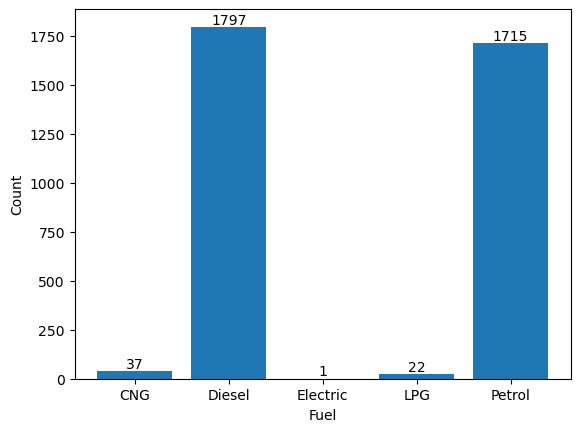

In [25]:
bars = plt.bar(df_fuel.index,df_fuel)
plt.xlabel('Fuel')
plt.ylabel('Count')
plt.bar_label(bars)
plt.show()

In [26]:
df_trans = df.groupby('transmission')['company'].count()
df_trans

transmission
Automatic     310
Manual       3262
Name: company, dtype: int64

In [27]:
df_trans = df.groupby('company')['name'].count()
df_trans

company
Ambassador          3
Audi               30
BMW                25
Chevrolet         151
Daewoo              1
Datsun             29
Fiat               32
Force               1
Ford              220
Honda             216
Hyundai           637
Isuzu               1
Jaguar              5
Jeep                3
Kia                 1
Land                5
MG                  2
Mahindra          327
Maruti           1070
Mercedes-Benz      20
Mitsubishi          5
Nissan             52
OpelCorsa           2
Renault           110
Skoda              49
Tata              308
Toyota            170
Volkswagen         93
Volvo               4
Name: name, dtype: int64

In [28]:
df[df['company']=="Land"]

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,company,year_old_2023
653,Rover Discovery,4000000,68000,Diesel,Individual,Automatic,First Owner,Land,5
869,Rover Discovery,4000000,68000,Petrol,Individual,Automatic,First Owner,Land,5
947,Rover Discovery,3500000,53000,Diesel,Dealer,Automatic,First Owner,Land,7
3014,Rover Range,2349000,149000,Diesel,Individual,Automatic,Second Owner,Land,11
3255,Rover Range,4200000,100000,Diesel,Dealer,Automatic,First Owner,Land,13


In [29]:
df['company'] = df['company'].replace(['Land'], 'Land-Rover')

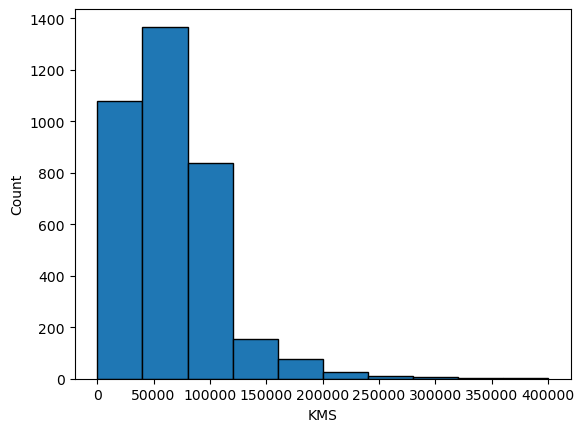

In [30]:
plt.hist(df['km_driven'],edgecolor='black')
plt.ylabel('Count')
plt.xlabel('KMS')
plt.show()

In [31]:
df_seller = df.groupby('seller_type')['seller_type'].count()
df_seller

seller_type
Dealer               708
Individual          2831
Trustmark Dealer      33
Name: seller_type, dtype: int64

#### Relationship between Price and Company

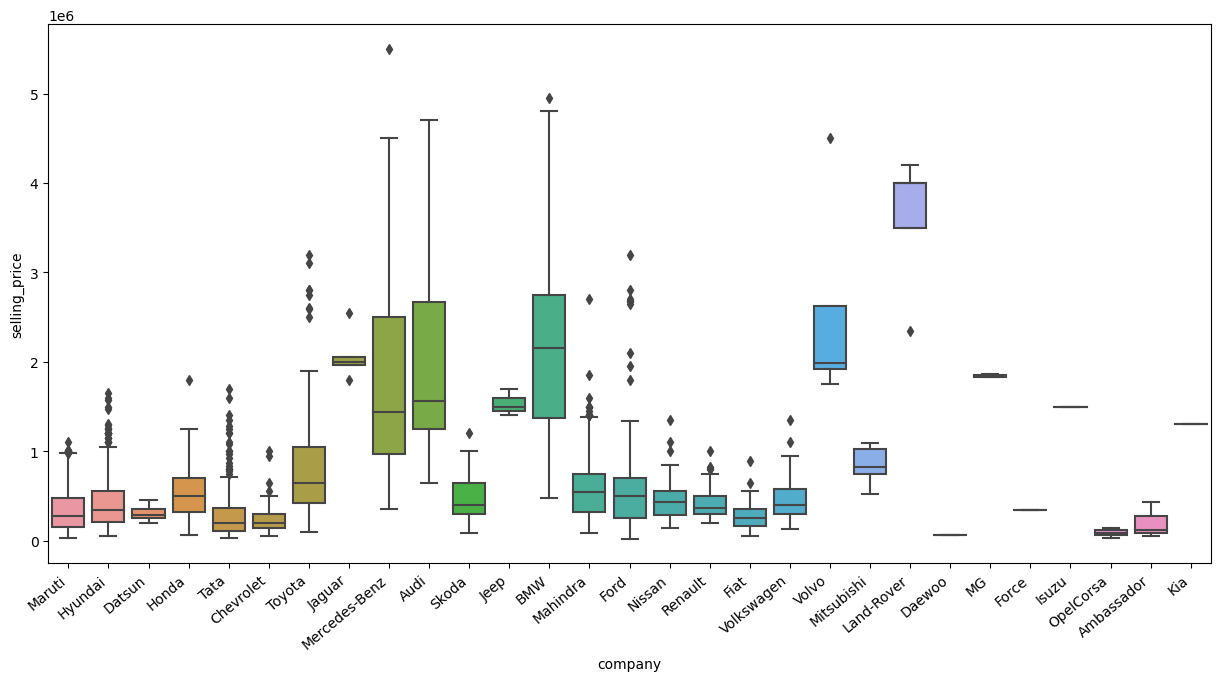

In [32]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='selling_price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()



#### Price vs Year

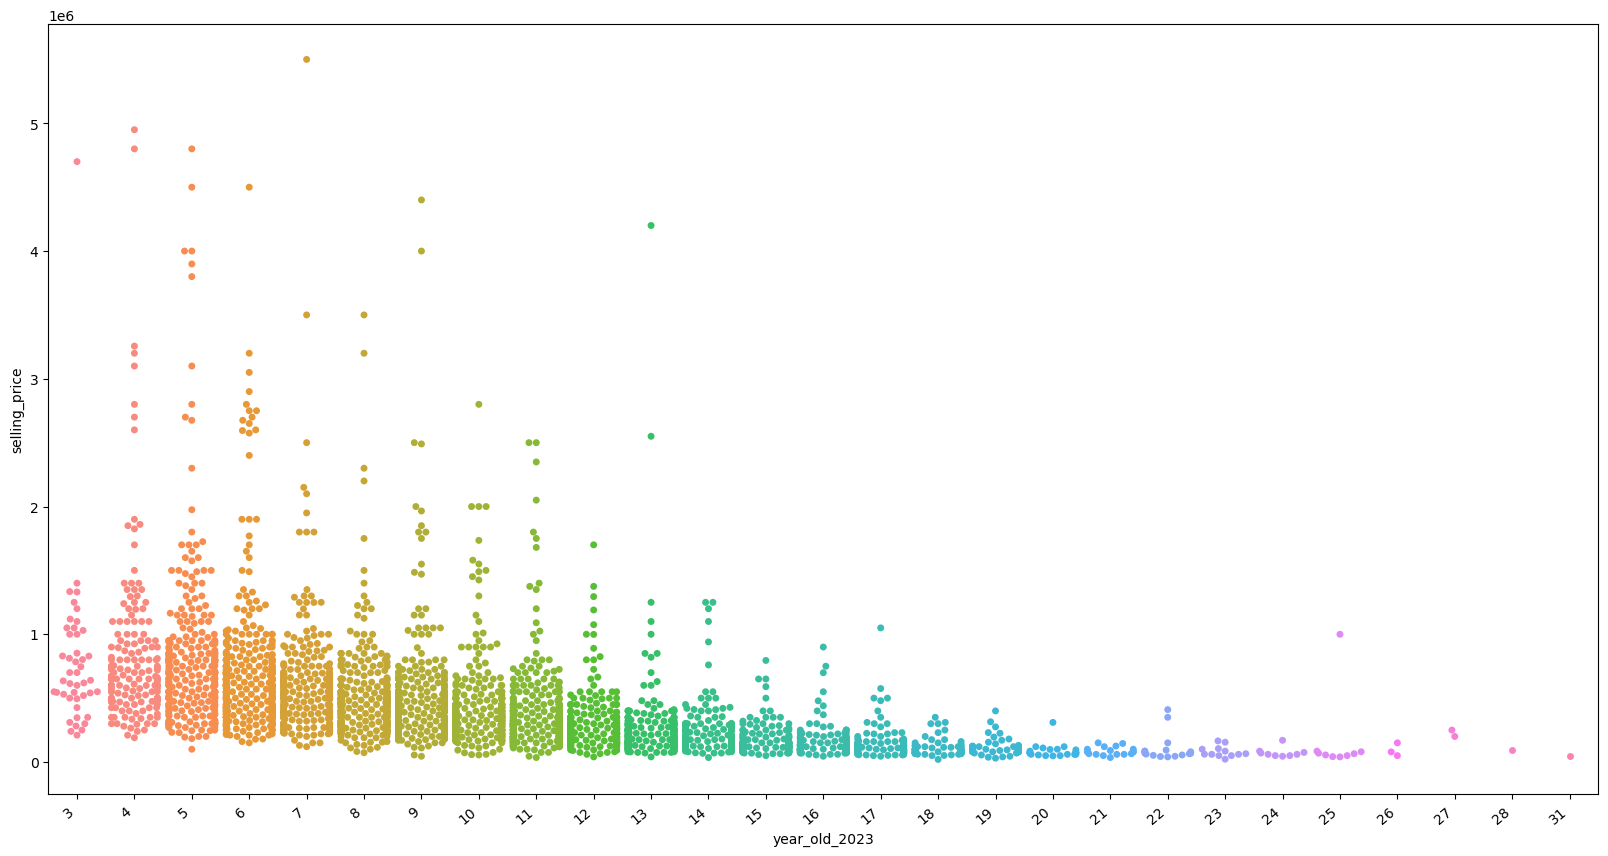

In [33]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year_old_2023',y='selling_price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

#### Price and Owner

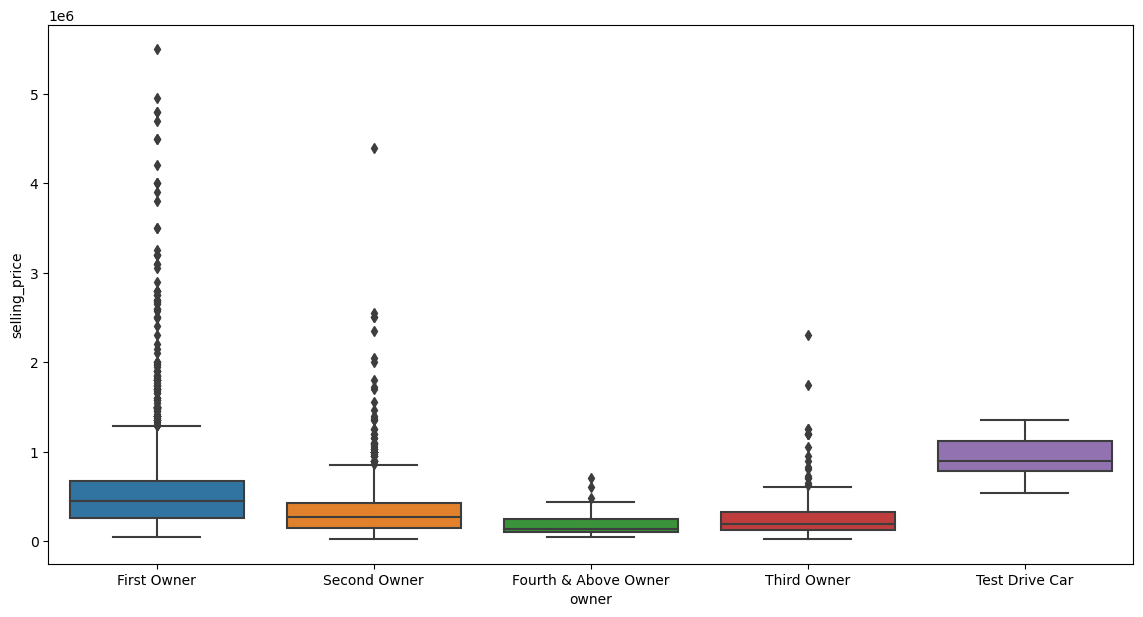

In [34]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='owner',y='selling_price',data=df)
plt.show()

#### Relationship between Price and Fuel

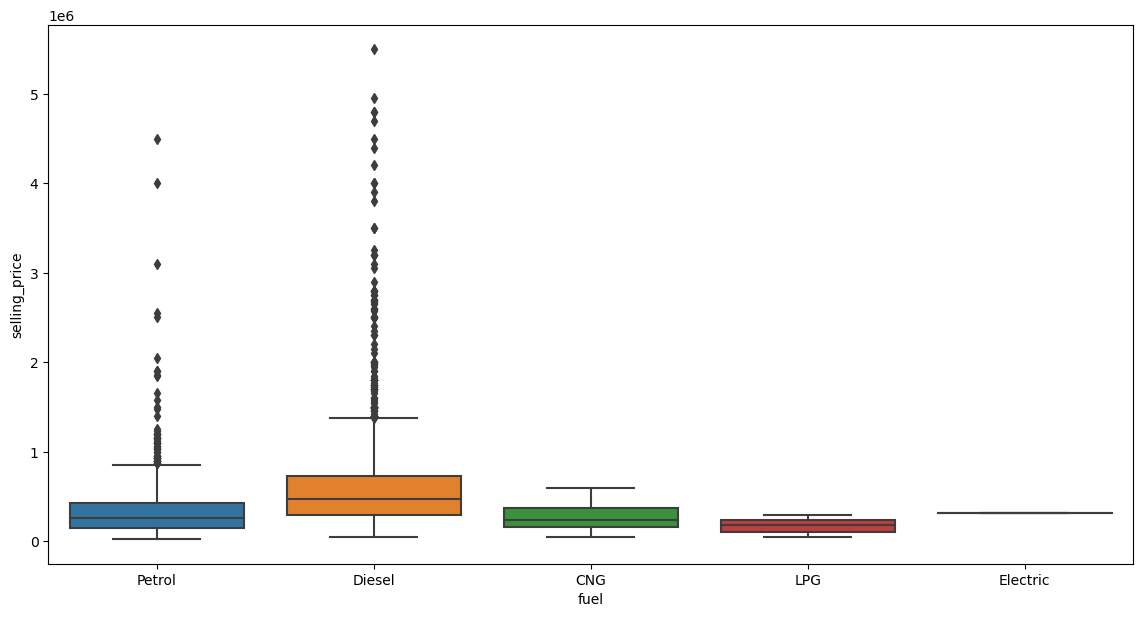

In [35]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel',y='selling_price',data=df)
plt.show()

#### Relationship between Price and KM Driven

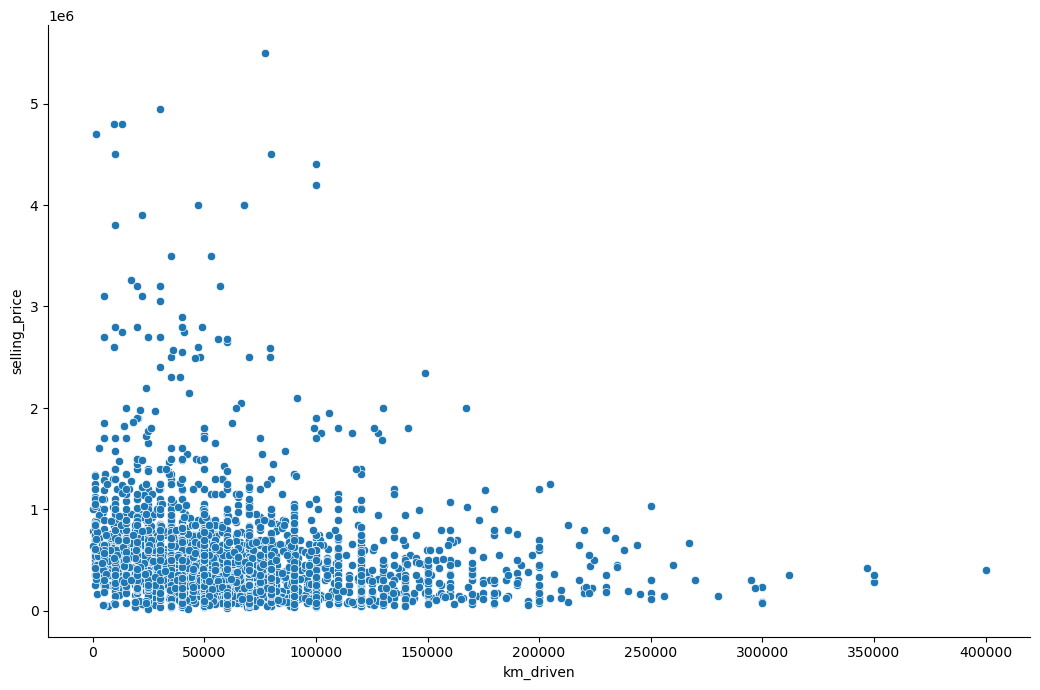

In [36]:
sns.relplot(x='km_driven',y='selling_price',data=df,height=7,aspect=1.5)
plt.show()

#### Relationship of Price with Fuel, Year and Company mixed

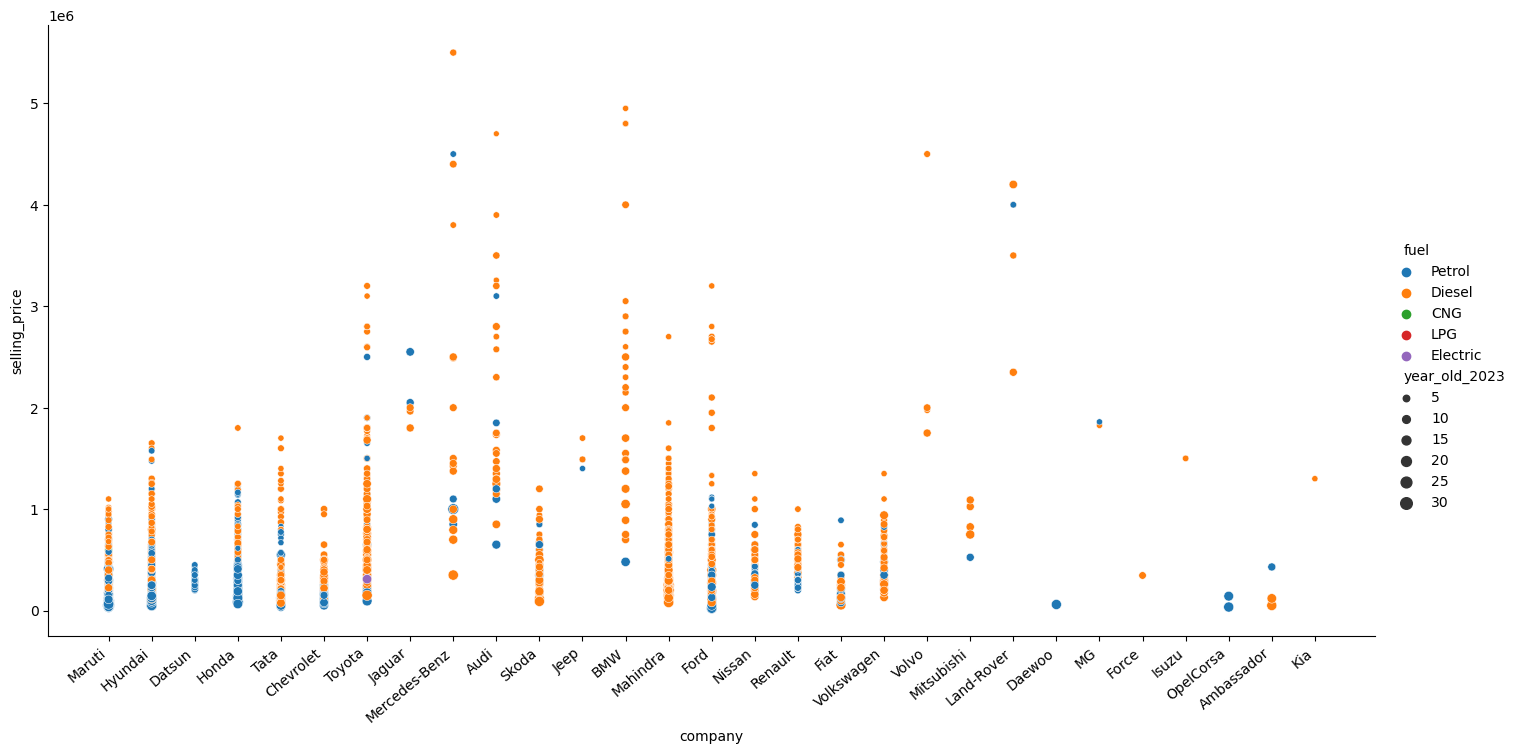

In [37]:
ax=sns.relplot(x='company',y='selling_price',data=df,hue='fuel',size='year_old_2023',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')
plt.show()

In [38]:
print(df.shape)
df.head()

(3572, 9)


,name,selling_price,km_driven,fuel,seller_type,transmission,owner,company,year_old_2023
0,800 AC,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,16
1,Wagon R,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,16
2,Verna 1.6,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,11
3,RediGO T,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,6
4,Amaze VX,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,9


#### Saving the clean data

In [39]:
df.to_csv('Cleaned_car_details.csv',index=False)

#### Select dependent (y) and independent (x   ) value

In [40]:
x= df.drop(["selling_price"], axis=1)
y= df.selling_price

print(x.shape)
print(type(x))
print(y.shape)
print(type(y))

(3572, 8)
<class 'pandas.core.frame.DataFrame'>
(3572,)
<class 'pandas.core.series.Series'>


#### Encoding

In [41]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error

In [42]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor

#### Splitting tha Data into train and test

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=2)

In [44]:
ohe = OneHotEncoder()
ohe.fit(x[['name','fuel','seller_type','transmission','owner','company']])

OneHotEncoder()

In [45]:
x.columns

Index(['name', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner',
       'company', 'year_old_2023'],
      dtype='object')

#### Linear Regression 

In [86]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',categories=ohe.categories_,handle_unknown='ignore'),[0,2,3,4,5,6])
],remainder='passthrough')

step2 = LinearRegression()

pipe_LR = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_LR.fit(x_train,y_train)

y_pred = pipe_LR.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7470725045404769
MAE 112495.88697263373


#### Ridge

In [47]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',categories=ohe.categories_,handle_unknown='ignore'),[0,2,3,4,5,6])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe_RR = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_RR.fit(x_train,y_train)

y_pred = pipe_RR.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6892326732491447
MAE 148535.59832624323


#### Lasso

In [48]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',categories=ohe.categories_,handle_unknown='ignore'),[0,2,3,4,5,6])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe_LAR = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_LAR.fit(x_train,y_train)

y_pred = pipe_LAR.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7052467991725963
MAE 115717.24548500878


#### KNN

In [49]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',categories=ohe.categories_,handle_unknown='ignore'),[0,2,3,4,5,6])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe_KNN = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_KNN.fit(x_train,y_train)

y_pred = pipe_KNN.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.20243329127789633
MAE 234546.42657342658


#### Decision Tree

In [50]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',categories=ohe.categories_,handle_unknown='ignore'),[0,2,3,4,5,6])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe_DT = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_DT.fit(x_train,y_train)

y_pred = pipe_DT.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.5632932026258186
MAE 163706.14703716003


#### Random Forest

In [84]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',categories=ohe.categories_,handle_unknown='ignore'),[0,2,3,4,5,6])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=2,
                              max_samples=0.5,
                              max_features=0.25,
                              max_depth=20)

pipe_RF = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_RF.fit(x_train,y_train)

y_pred = pipe_RF.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7720727969956629
MAE 119282.99782628109


#### Bagging

In [52]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',categories=ohe.categories_,handle_unknown='ignore'),[0,2,3,4,5,6])
],remainder='passthrough')

step2 = BaggingRegressor(n_estimators=500, verbose= 1)

pipe_BG = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_BG.fit(x_train,y_train)

y_pred = pipe_BG.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


R2 score 0.7738943189954731
MAE 116681.91494115682


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s finished


#### Ada Boost

In [87]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',categories=ohe.categories_,handle_unknown='ignore'),[0,2,3,4,5,6])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=10000, learning_rate=1.15)

pipe_ABR = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_ABR.fit(x_train,y_train)

y_pred = pipe_ABR.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.4080756542638021
MAE 253337.07032725794


#### Saving and Exporting Best Model

In [88]:
import pickle

In [89]:
pickle.dump(pipe_RF,open('pipe_RF.pkl','wb'))
pickle.dump(df,open('df.pkl','wb'))

#### Selecting 20 random data point

In [90]:
random20 = df.sample(20).reset_index()
test20 = random20.drop(['index','selling_price'],axis=1)
test20.head(1)

,name,km_driven,fuel,seller_type,transmission,owner,company,year_old_2023
0,Zen LXI,120000,Petrol,Individual,Manual,Second Owner,Maruti,25


In [91]:
random20.head(1)

,index,name,selling_price,km_driven,fuel,seller_type,transmission,owner,company,year_old_2023
0,2952,Zen LXI,80000,120000,Petrol,Individual,Manual,Second Owner,Maruti,25


#### Checking Data information

In [92]:
test20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           20 non-null     object
 1   km_driven      20 non-null     int64 
 2   fuel           20 non-null     object
 3   seller_type    20 non-null     object
 4   transmission   20 non-null     object
 5   owner          20 non-null     object
 6   company        20 non-null     object
 7   year_old_2023  20 non-null     int64 
dtypes: int64(2), object(6)
memory usage: 1.4+ KB


#### Saving Random 20 data point to CSV file

In [93]:
random20.to_csv("Random_20_data.csv", index=False)

#### Loading the Model

In [94]:
load_model = pickle.load(open('pipe_RF.pkl','rb'))
print(load_model)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(categories=[array(['1.4 GL', '1.6Gls', '3 Series', '5 Series', '500 Lounge',
       '7 Series', '800 AC', '800 DUO', '800 DX', '800 EX', '800 Std',
       'A-Star AT', 'A-Star Lxi', 'A-Star Vxi', 'A4 1.8', 'A4 2.0',
       'A4 3.0', 'A4 30', 'A4 35', 'A4 New', 'A5 Sportback', 'A6 2.0',
       'A6 2.7', 'A6 2.8', 'A8 4....
       'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar',
       'Jeep', 'Kia', 'Land-Rover', 'MG', 'Mahindra', 'Maruti',
       'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'OpelCorsa', 'Renault',
       'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object)],
                                                                drop='first',
                                                                handle_unknown='ignore',
                 

#### Now lets use the model to predict the Target variable and then we will compare

In [95]:
Prediction = load_model.predict(test20)


#### Compare

In [96]:
Compare = {'Original' : random20['selling_price'],
                       'Prediction' : Prediction}

Result = pd.DataFrame(Compare)
Result

,Original,Prediction
0,80000,8.156926e+04
1,265000,3.399136e+05
2,525000,4.260562e+05
3,120000,1.162137e+05
4,120000,1.471277e+05
5,160000,1.935419e+05
6,400000,4.029254e+05
7,780000,6.451016e+05
8,120000,1.263317e+05
9,1300000,1.975536e+06
